In [237]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [238]:
df = pd.read_csv("clean_dataset.csv")

In [239]:
df

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,Industrials,White,1.25,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,Black,3.04,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,Black,1.50,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,White,3.75,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,White,1.71,1,0,0,0,ByOtherMeans,120,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1,21.08,10.085,0,0,Education,Black,1.25,0,0,0,0,ByBirth,260,0,0
686,0,22.67,0.750,1,1,Energy,White,2.00,0,1,2,1,ByBirth,200,394,0
687,0,25.25,13.500,0,0,Healthcare,Latino,2.00,0,1,1,1,ByBirth,200,1,0
688,1,17.92,0.205,1,1,ConsumerStaples,White,0.04,0,0,0,0,ByBirth,280,750,0


There are 16 columns. "Approved" column will be the dependent variable because we want to know which customer can have a credit card. So the other columns will be features. Also, "Industry", "Ethnicity", "Citizen" columns have string data, thus firstly, we have to encode these columns.

### Encoding

In [240]:
df["Industry"].unique()

array(['Industrials', 'Materials', 'CommunicationServices', 'Transport',
       'InformationTechnology', 'Financials', 'Energy', 'Real Estate',
       'Utilities', 'ConsumerDiscretionary', 'Education',
       'ConsumerStaples', 'Healthcare', 'Research'], dtype=object)

<b>Industry</b>

In [241]:
industry = df["Industry"].values

In [242]:
from sklearn import preprocessing

In [243]:
ohe = preprocessing.OneHotEncoder()

In [244]:
industry = ohe.fit_transform(industry.reshape(-1,1)).toarray()

In [245]:
industry

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [246]:
industry_df = pd.DataFrame(industry, columns=["CommunicationServices","ConsumerDiscretionary","ConsumerStaples","Education","Energy","Financials","Healthcare","Industrials","InformationTechnology","Materials","RealEstate","Research","Transport","Utilities"])

In [247]:
industry_df.head()

,CommunicationServices,ConsumerDiscretionary,ConsumerStaples,Education,Energy,Financials,Healthcare,Industrials,InformationTechnology,Materials,RealEstate,Research,Transport,Utilities
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


<b>Ethnicity</b>

In [248]:
df["Ethnicity"].unique()

array(['White', 'Black', 'Asian', 'Latino', 'Other'], dtype=object)

In [249]:
ethnic = df["Ethnicity"].values

In [250]:
ethnic = ohe.fit_transform(ethnic.reshape(-1,1)).toarray()

In [251]:
ethnic

array([[0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.]])

In [252]:
ethnic_df = pd.DataFrame(ethnic, columns=["Asian","Black","Latino","Other","White"])

In [253]:
ethnic_df.head()

,Asian,Black,Latino,Other,White
0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,1.0


<b>Citizen</b>

In [254]:
df["Citizen"].unique()

array(['ByBirth', 'ByOtherMeans', 'Temporary'], dtype=object)

In [255]:
citizen = df["Citizen"].values

In [256]:
citizen = ohe.fit_transform(citizen.reshape(-1,1)).toarray()

In [257]:
citizen

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [258]:
citizen_df = pd.DataFrame(citizen, columns=["ByBirth","ByOtherMeans","Temporary"])

In [259]:
citizen_df.head()

,ByBirth,ByOtherMeans,Temporary
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,0.0,1.0,0.0


Now we have to delete the columns that contain string data and add these encoded columns

In [260]:
df = df.drop(["Industry","Ethnicity","Citizen"], axis=1)

In [261]:
df.head()

,Gender,Age,Debt,Married,BankCustomer,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,1.25,1,1,1,0,202,0,1
1,0,58.67,4.460,1,1,3.04,1,1,6,0,43,560,1
2,0,24.50,0.500,1,1,1.50,1,0,0,0,280,824,1
3,1,27.83,1.540,1,1,3.75,1,1,5,1,100,3,1
4,1,20.17,5.625,1,1,1.71,1,0,0,0,120,0,1


In [262]:
for i in industry_df: #industry
    df[i] = industry_df[i]

for i in ethnic_df: #ethnicity
    df[i] = ethnic_df[i]
    
for i in citizen_df: #citizen
    df[i] = citizen_df[i]

In [263]:
df.head()

,Gender,Age,Debt,Married,BankCustomer,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,...,Transport,Utilities,Asian,Black,Latino,Other,White,ByBirth,ByOtherMeans,Temporary
0,1,30.83,0.000,1,1,1.25,1,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,0,58.67,4.460,1,1,3.04,1,1,6,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0,24.50,0.500,1,1,1.50,1,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1,27.83,1.540,1,1,3.75,1,1,5,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,1,20.17,5.625,1,1,1.71,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


Now we can assign the dependent variable. As we said above, this variable must be "Approved" data.

In [264]:
x = df.drop("Approved", axis=1).values
y = df["Approved"].values #dependent variable

Spliting data into train and test.

In [265]:
from sklearn.model_selection import train_test_split

In [266]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=0)

Now we have to scale x_train and x_test.

In [267]:
scaler = preprocessing.MinMaxScaler()

In [268]:
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

Now we can build classification models.

### Naive Bayes Classifier

In [269]:
from sklearn.naive_bayes import GaussianNB

In [270]:
gnb = GaussianNB()

In [271]:
gnb.fit(X_train,y_train) #training the model

GaussianNB()

In [272]:
gnb_pred = gnb.predict(X_test) #making predictions

We will use confusion matrix for evaluating the models.

In [273]:
from sklearn.metrics import confusion_matrix

In [274]:
gnb_cm = confusion_matrix(y_test, gnb_pred)

In [275]:
gnb_cm #NaiveBayes

array([[123,   6],
       [ 64,  35]], dtype=int64)

### K-Nearest Neighbors Algorithm

In [276]:
from sklearn.neighbors import KNeighborsClassifier

We will set the n value to 5 and use euclidean distance for the metric variable.

In [277]:
knn = KNeighborsClassifier(n_neighbors=5, metric="euclidean")

In [278]:
knn.fit(X_train, y_train) #training the model

KNeighborsClassifier(metric='euclidean')

In [279]:
knn_pred = knn.predict(X_test) #making predicts

In [280]:
knn_cm = confusion_matrix(y_test, knn_pred) #creating confusion matrix

In [281]:
knn_cm #K-Nearest Neighbors

array([[113,  16],
       [ 22,  77]], dtype=int64)

### Decision Tree Classifier

In [282]:
from sklearn.tree import DecisionTreeClassifier

We will choose "entropy" for the criterion function.

In [283]:
dtc = DecisionTreeClassifier(criterion="entropy")

In [284]:
dtc.fit(X_train, y_train) #training the model

DecisionTreeClassifier(criterion='entropy')

In [285]:
dtc_pred = dtc.predict(X_test) #making predicts

In [286]:
dtc_cm = confusion_matrix(y_test, dtc_pred) #creating confusion matrix

In [287]:
dtc_cm #Decision Tree

array([[104,  25],
       [ 20,  79]], dtype=int64)

### Random Forest Classifier

In [288]:
from sklearn.ensemble import RandomForestClassifier

We will set the tree number to 20 and choose "entropy" for the criterion function.

In [289]:
rfc = RandomForestClassifier(n_estimators=20, criterion="entropy")

In [290]:
rfc.fit(X_train, y_train) #training the model

RandomForestClassifier(criterion='entropy', n_estimators=20)

In [291]:
rfc_pred = rfc.predict(X_test) #making predicts

In [292]:
rfc_cm = confusion_matrix(y_test, rfc_pred) #creating confusion matrix

In [293]:
rfc_cm #Random Forest

array([[115,  14],
       [ 22,  77]], dtype=int64)

### Logistic Regression Classifier

In [294]:
from sklearn.linear_model import LogisticRegression

In [295]:
lr = LogisticRegression()

In [296]:
lr.fit(X_train, y_train) #training the model

LogisticRegression()

In [297]:
lr_pred = lr.predict(X_test) #making predictions

In [298]:
lr_cm = confusion_matrix(y_test, lr_pred) #creating confusion matrix 

In [299]:
lr_cm #Logistic Regression

array([[105,  24],
       [ 13,  86]], dtype=int64)

When we examine the results, KNN, decision tree and random forest models are working very succesfully. In addition to confusion matrix, we can plot the roc curve for these models to evaluate the results.

In [300]:
from sklearn import metrics

In [301]:
knn_proba = knn.predict_proba(X_test) #knn -> k-nearest neighbors
dtc_proba = knn.predict_proba(X_test) #dtc -> decision tree
rfc_proba = rfc.predict_proba(X_test) #rfc -> random forest

In [302]:
knn_fpr, knn_tpr, knn_thold = metrics.roc_curve(y_test, knn_proba[:,1], pos_label=1)
dtc_fpr, dtc_tpr, dtc_thold = metrics.roc_curve(y_test, dtc_proba[:,1], pos_label=1)
rfc_fpr, rfc_tpr, rfc_thold = metrics.roc_curve(y_test, rfc_proba[:,1], pos_label=1)

In [303]:
knn_roc_auc = metrics.auc(knn_fpr, knn_tpr)
dtc_roc_auc = metrics.auc(dtc_fpr, dtc_tpr)
rfc_roc_auc = metrics.auc(rfc_fpr, rfc_tpr)

In [304]:
knn_display = metrics.RocCurveDisplay(fpr=knn_fpr, tpr=knn_tpr, roc_auc=knn_roc_auc, estimator_name="KNN")
dtc_display = metrics.RocCurveDisplay(fpr=dtc_fpr, tpr=dtc_tpr, roc_auc=dtc_roc_auc, estimator_name="Decision Tree")
rfc_display = metrics.RocCurveDisplay(fpr=rfc_fpr, tpr=rfc_tpr, roc_auc=rfc_roc_auc, estimator_name="Random Forest")

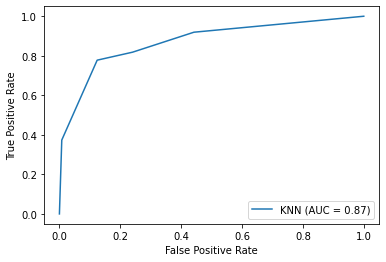

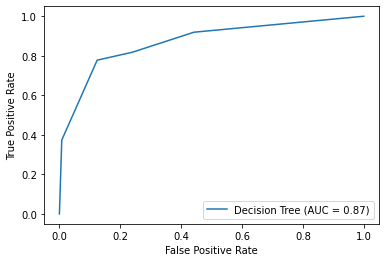

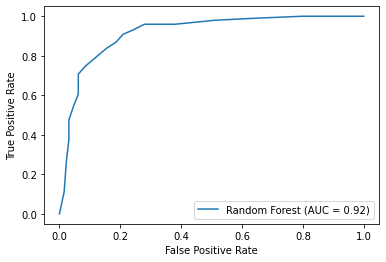

In [305]:
knn_display.plot()
dtc_display.plot()
rfc_display.plot()